In [488]:
import pandas as pd 
import os
from pathlib import Path
import re
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Do My Best Physical Days Align with My Best Mental Days?

In [489]:
post_name="best_days_post4"
save_dir=f"figures/{post_name}"
os.makedirs(save_dir,exist_ok=True)

## Data Access Note

This notebook documents an analysis performed locally on private data.
Raw datasets are not included in this public repository (but will be explained in the data folder).
Code cells that load data are shown for transparency but are not intended to be executed here.

In [490]:
# cleaned_path=Path("/Users/yeshimonipede/Desktop/2025_DataProject/Data/Cleaned")

# # Load the cleaned CSVs
# # am_form = pd.read_csv(cleaned_path/"am_form_cleaned.csv")
# # pm_form = pd.read_csv(cleaned_path/"pm_form_cleaned.csv")
# # sleep_rc = pd.read_csv(cleaned_path/"sleep_rc_cleaned.csv")
# # vitals_rc = pd.read_csv(cleaned_path/"vitals_rc_cleaned.csv")
# # activity_rc = pd.read_csv(cleaned_path/"activity_rc_cleaned.csv")
# # habits=pd.read_csv(cleaned_path/"habits_cleaned.csv")
# # meditation=pd.read_csv(cleaned_path/"med_day_cleaned.csv")
# # screentime=pd.read_csv(cleaned_path/"screen_time_cleaned.csv")


# am_form = pd.read_pickle(cleaned_path/"am_form_cleaned.pkl")
# pm_form = pd.read_pickle(cleaned_path/"pm_form_cleaned.pkl")
# sleep_rc = pd.read_pickle(cleaned_path/"sleep_rc_cleaned.pkl")
# vitals_rc = pd.read_pickle(cleaned_path/"vitals_rc_cleaned.pkl")
# activity_rc = pd.read_pickle(cleaned_path/"activity_rc_cleaned.pkl")
# habits=pd.read_pickle(cleaned_path/"habits_cleaned.pkl")
# meditation=pd.read_pickle(cleaned_path/"med_day_cleaned.pkl")
# screentime=pd.read_pickle(cleaned_path/"screen_time_cleaned.pkl")

In [491]:
#convert to datetime values
sleep_rc['Falling_Asleep_Time'] = pd.to_datetime(
    sleep_rc['Falling_Asleep_Time'], errors='coerce'
)

sleep_rc['Wake_Up_Time'] = pd.to_datetime(
    sleep_rc['Wake_Up_Time'], errors='coerce'
)

#extract the time as a string
sleep_rc['Falling_Asleep_Time_only'] = sleep_rc['Falling_Asleep_Time'].dt.strftime('%H:%M')
sleep_rc['Wake_Up_Time_only'] = sleep_rc['Wake_Up_Time'].dt.strftime('%H:%M')

/var/folders/7g/y70jz2ks10xdctq8v1dd7_qw0000gn/T/ipykernel_74725/4184177737.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  sleep_rc['Falling_Asleep_Time'] = pd.to_datetime(
/var/folders/7g/y70jz2ks10xdctq8v1dd7_qw0000gn/T/ipykernel_74725/4184177737.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  sleep_rc['Wake_Up_Time'] = pd.to_datetime(


In [492]:
am_form.tail(96)

,Date,DayofWeek,Optimism_AM,Mind_AM,Energy_AM,Priority_AM,Workout_Intention,Workday,Weather_Optimism,How_Well_Prediction_AM,Crazy_Prediction_AM
101,2025-08-22,Friday,3,3,2,Survival,No,No,4.0,3,3.0
102,2025-08-25,Monday,2,2,3,Recovery,Yes,Yes - normal work day,3.0,3,2.0
103,2025-08-26,Tuesday,3,4,4,Recovery,Yes,Yes - normal work day,4.0,4,4.0
104,2025-08-28,Thursday,2,3,2,Survival,Yes,Yes - normal work day,5.0,4,3.0
105,2025-08-29,Friday,3,3,4,Productivity,No,Yes - normal work day,2.0,4,3.0
...,...,...,...,...,...,...,...,...,...,...,...
192,2025-12-04,Thursday,4,4,1,Survival,Yes,Yes - normal work day,3.0,4,2.0
193,2025-12-05,Friday,4,3,2,Recovery,No,Kinda- have to work for part of the day,2.0,4,4.0
194,2025-12-06,Saturday,4,4,4,Fun,Yes,No,5.0,4,5.0
195,2025-12-07,Sunday,4,3,3,Fun,Yes,No,4.0,4,4.0


In [493]:
pm_form.tail(85)

,Date,Workout_PM,Meditation_PM,Fatigue_PM,Crazy_PM,Mental_PM,High_PM,Fun_PM,Intention_Satisfaction_PM,Satisfied_PM,Notes
91,2025-08-24,No,Yes,5,4.0,2,5,3,4,2.0,NaN
92,2025-08-26,Yes,Yes,1,3.0,4,3,3,4,4.0,NaN
93,2025-08-28,Yes,No,5,3.0,3,3,5,3,4.0,NaN
94,2025-08-29,Yes,Yes,5,4.0,2,3,3,4,2.0,NaN
95,2025-08-29,No,Yes,5,4.0,3,3,3,3,3.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
171,2025-12-04,Yes,No,5,4.0,4,3,5,5,5.0,NaN
172,2025-12-04,Yes,Yes,4,4.0,3,3,3,3,4.0,NaN
173,2025-12-05,No,Yes,5,4.0,3,4,4,4,5.0,NaN
174,2025-12-06,Yes,Yes,5,5.0,3,4,4,5,5.0,NaN


In [494]:
print(sleep_rc['Date'].dtype)

datetime64[ns]


In [495]:
activity_rc.tail()

,Date,Steps,Calories(kcal)
333,2025-12-03,7712.0,1349
334,2025-12-04,9137.0,1370
335,2025-12-05,4834.0,1238
336,2025-12-06,8270.0,1336
337,2025-12-07,5962.0,1314


In [496]:
#creating a master df for this analysis 
dfs=[am_form, pm_form, 
     sleep_rc,vitals_rc, activity_rc, habits, meditation, screentime]

merged_df=dfs[0]

#merge the dfs one by one on Date
for df in dfs[1:]:
    merged_df=pd.merge(merged_df, df, on='Date', how='outer')
    

In [497]:
#Selecting the columns of interest for this analysis 
names = ['am_form', 'pm_form', 'sleep_rc', 'vitals_rc', 'activity_rc', 'habits', 'meditation', 'screentime']

for name, df in zip(names, dfs):
    if 'Date' in df.columns:
        print(f"{name}: {df['Date'].dtype}")
    else:
        print(f"{name}: no 'Date' column")

am_form: datetime64[ns]
pm_form: datetime64[ns]
sleep_rc: datetime64[ns]
vitals_rc: datetime64[ns]
activity_rc: datetime64[ns]
habits: datetime64[ns]
meditation: datetime64[ns]
screentime: datetime64[ns]


In [499]:
merged_df.columns

Index(['Date', 'DayofWeek', 'Optimism_AM', 'Mind_AM', 'Energy_AM',
       'Priority_AM', 'Workout_Intention', 'Workday', 'Weather_Optimism',
       'How_Well_Prediction_AM', 'Crazy_Prediction_AM', 'Workout_PM',
       'Meditation_PM', 'Fatigue_PM', 'Crazy_PM', 'Mental_PM', 'High_PM',
       'Fun_PM', 'Intention_Satisfaction_PM', 'Satisfied_PM', 'Notes',
       'Start_time', 'Falling_Asleep_Time', 'Wake_Up_Time', 'Sleep_Ratio',
       'TimeAsleep_min', 'Awake(min)', 'REM(min)', 'Light_Sleep(min)',
       'Deep_Sleep(min)', 'Falling_Asleep_Time_only', 'Wake_Up_Time_only',
       'HR_avg', 'HR_min', 'HR_max', 'Spo2(%)_avg', 'Spo2(%)_min',
       'Max. Spo2(%)', 'HRV_avg', 'HRV_min', 'HRV_max', 'Steps',
       'Calories(kcal)', 'Clean_5min', 'Journal', 'workout',
       'consume_literature', 'Turkish', 'Creatine', 'Meditation',
       'Screen_Time', 'Instagram', 'TikTok', 'Messages', 'PickUps',
       'Message_notifications', 'Screen_Time_min'],
      dtype='object')

### Identifying the variables related to physical state 

In [500]:
physical_vars=["Date","Sleep_Ratio", "HRV_avg", "Fatigue_PM", 'Energy_AM', 'HR_min', 'Steps',
       'Calories(kcal)', 'Clean_5min', 'Journal', 'workout',
       'consume_literature', 'Turkish', 'Creatine', 'Meditation',
       'Screen_Time', 'Instagram', 'TikTok', 'Messages', 'PickUps',
       'Message_notifications', 'Screen_Time_min', 'Wake_Up_Time', 
       'TimeAsleep_min', 'Awake(min)', 'REM(min)', 'Light_Sleep(min)',
       'Deep_Sleep(min)','DayofWeek']
df_physical=merged_df[physical_vars].copy()

physical_score_vars=["HRV_avg", "Fatigue_PM", 'Energy_AM', 'HR_min']

#Decide if these are definitely the variables i want to use for physical

In [501]:
df_physical.columns

Index(['Date', 'Sleep_Ratio', 'HRV_avg', 'Fatigue_PM', 'Energy_AM', 'HR_min',
       'Steps', 'Calories(kcal)', 'Clean_5min', 'Journal', 'workout',
       'consume_literature', 'Turkish', 'Creatine', 'Meditation',
       'Screen_Time', 'Instagram', 'TikTok', 'Messages', 'PickUps',
       'Message_notifications', 'Screen_Time_min', 'Wake_Up_Time',
       'TimeAsleep_min', 'Awake(min)', 'REM(min)', 'Light_Sleep(min)',
       'Deep_Sleep(min)', 'DayofWeek'],
      dtype='object')

### Scaling the data 

In [503]:
scaler=MinMaxScaler()

df_physical_scaled=df_physical.copy()

#Invert fatigue so lower = better
df_physical_scaled['Fatgue_PM']=df_physical_scaled['Fatigue_PM'].max()-df_physical_scaled['Fatigue_PM']

#Invert min HR so lower = better
df_physical_scaled['HR_min']=df_physical_scaled['HR_min'].max()-df_physical_scaled['HR_min']

#Apply MinMax scaling
df_physical_scaled[physical_score_vars]=scaler.fit_transform(df_physical_scaled[physical_score_vars])



## Creating a "physical score" to identify the days I felt my best physically

In [504]:
# Define weights 
weights={
    'HRV_avg': 0.3 ,
    'Fatigue_PM': 0.2,
    'Energy_AM': 0.2,
    'HR_min': 0.22
}

df_physical_scaled["Physical_Score"]=sum(df_physical_scaled[var]*w
                                        for var, w in weights.items())

In [505]:
df_physical_scaled=df_physical_scaled.dropna(subset=['Physical_Score'])


In [506]:
df_physical_scaled.columns

Index(['Date', 'Sleep_Ratio', 'HRV_avg', 'Fatigue_PM', 'Energy_AM', 'HR_min',
       'Steps', 'Calories(kcal)', 'Clean_5min', 'Journal', 'workout',
       'consume_literature', 'Turkish', 'Creatine', 'Meditation',
       'Screen_Time', 'Instagram', 'TikTok', 'Messages', 'PickUps',
       'Message_notifications', 'Screen_Time_min', 'Wake_Up_Time',
       'TimeAsleep_min', 'Awake(min)', 'REM(min)', 'Light_Sleep(min)',
       'Deep_Sleep(min)', 'DayofWeek', 'Fatgue_PM', 'Physical_Score'],
      dtype='object')

In [507]:
df_physical_scaled.tail(25)

,Date,Sleep_Ratio,HRV_avg,Fatigue_PM,Energy_AM,HR_min,Steps,Calories(kcal),Clean_5min,Journal,...,Screen_Time_min,Wake_Up_Time,TimeAsleep_min,Awake(min),REM(min),Light_Sleep(min),Deep_Sleep(min),DayofWeek,Fatgue_PM,Physical_Score
343,2025-11-06,93.00%,0.328767,1.00,0.50,0.60,6140.0,1314.0,1.0,1.0,...,265.0,2025-12-19 07:33:00,388.0,17.0,105.0,228.0,55.0,Thursday,0.0,0.530630
344,2025-11-07,91.00%,0.493151,1.00,0.25,0.68,8877.0,1294.0,0.0,1.0,...,205.0,2025-12-19 07:45:00,482.0,36.0,55.0,352.0,75.0,Friday,0.0,0.547545
345,2025-11-08,92.00%,0.452055,1.00,0.25,0.72,7203.0,1252.0,1.0,0.0,...,271.0,2025-12-19 09:03:00,647.0,25.0,160.0,305.0,182.0,Saturday,0.0,0.544016
346,2025-11-09,NaN,0.328767,1.00,0.50,0.44,7624.0,1427.0,1.0,1.0,...,323.0,NaT,NaN,NaN,NaN,NaN,NaN,Sunday,0.0,0.495430
347,2025-11-09,NaN,0.328767,1.00,0.50,0.44,7624.0,1427.0,1.0,1.0,...,323.0,NaT,NaN,NaN,NaN,NaN,NaN,Sunday,0.0,0.495430
351,2025-11-13,80.00%,0.657534,0.75,0.50,0.80,6659.0,1310.0,0.0,1.0,...,258.0,2025-12-19 08:16:00,520.0,87.0,90.0,350.0,80.0,Thursday,1.0,0.623260
354,2025-11-16,93.00%,0.643836,0.50,0.50,0.80,7092.0,1392.0,1.0,0.0,...,151.0,2025-12-19 09:56:00,592.0,21.0,130.0,383.0,79.0,Sunday,2.0,0.569151
355,2025-11-17,93.00%,0.753425,0.50,0.50,0.96,7883.0,1317.0,1.0,1.0,...,403.0,2025-12-19 07:28:00,390.0,15.0,75.0,240.0,75.0,Monday,2.0,0.637227
356,2025-11-18,90.00%,0.616438,0.75,0.75,0.80,6860.0,1266.0,1.0,1.0,...,294.0,2025-12-19 07:34:00,430.0,25.0,95.0,245.0,90.0,Tuesday,1.0,0.660932
357,2025-11-18,90.00%,0.616438,1.00,0.75,0.80,6860.0,1266.0,1.0,1.0,...,294.0,2025-12-19 07:34:00,430.0,25.0,95.0,245.0,90.0,Tuesday,0.0,0.710932


### Pulling out the variables related to mental state

In [508]:
mental_vars=["Date","Mind_AM", "Mental_PM", "Satisfied_PM", 'Optimism_AM', 'Steps',
       'Calories(kcal)', 'Clean_5min', 'Journal', 'workout',
       'consume_literature', 'Turkish', 'Creatine', 'Meditation',
       'Screen_Time', 'Instagram', 'TikTok', 'Messages', 'PickUps',
       'Message_notifications', 'Screen_Time_min',
       'TimeAsleep_min', 'Awake(min)', 'REM(min)', 'Light_Sleep(min)',
       'Deep_Sleep(min)', 'DayofWeek']
df_mental=merged_df[mental_vars].copy()

mental_score_vars=["Mind_AM", "Mental_PM", "Satisfied_PM", 'Optimism_AM']

In [509]:
scaler=MinMaxScaler()

df_mental_scaled=df_mental.copy()

#Apply MinMax scaling
df_mental_scaled[mental_score_vars]=scaler.fit_transform(df_mental_scaled[mental_score_vars])


## Creating a "mental score" to identify the days I felt my best mentally

In [510]:
# Define weights 
weights={
    'Mind_AM': 0.35,
    'Mental_PM': 0.35 ,
    'Satisfied_PM': 0.15,
    'Optimism_AM': 0.15
}

df_mental_scaled["Mental_Score"]=sum(df_mental_scaled[var]*w for var, w in weights.items())

In [511]:
df_physical_scaled.head(25)
df_mental_scaled.head(25)

,Date,Mind_AM,Mental_PM,Satisfied_PM,Optimism_AM,Steps,Calories(kcal),Clean_5min,Journal,workout,...,PickUps,Message_notifications,Screen_Time_min,TimeAsleep_min,Awake(min),REM(min),Light_Sleep(min),Deep_Sleep(min),DayofWeek,Mental_Score
0,2025-01-01,NaN,NaN,NaN,NaN,3734.0,1316.0,NaN,NaN,NaN,...,NaN,NaN,NaN,255.0,25.0,75.0,130.0,50.0,NaN,NaN
1,2025-01-02,NaN,NaN,NaN,NaN,5414.0,1376.0,NaN,NaN,NaN,...,NaN,NaN,NaN,648.0,12.0,118.0,402.0,128.0,NaN,NaN
2,2025-01-03,NaN,NaN,NaN,NaN,8335.0,1510.0,NaN,NaN,NaN,...,NaN,NaN,NaN,533.0,82.0,55.0,378.0,100.0,NaN,NaN
3,2025-01-04,NaN,NaN,NaN,NaN,5725.0,1313.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2025-01-05,NaN,NaN,NaN,NaN,3107.0,1297.0,NaN,NaN,NaN,...,NaN,NaN,NaN,455.0,20.0,125.0,240.0,90.0,NaN,NaN
5,2025-01-06,NaN,NaN,NaN,NaN,6368.0,1372.0,NaN,NaN,NaN,...,NaN,NaN,NaN,572.0,43.0,112.0,368.0,92.0,NaN,NaN
6,2025-01-07,NaN,NaN,NaN,NaN,8223.0,1432.0,NaN,NaN,NaN,...,NaN,NaN,NaN,480.0,15.0,113.0,277.0,90.0,NaN,NaN
7,2025-01-08,NaN,NaN,NaN,NaN,5862.0,1441.0,NaN,NaN,NaN,...,NaN,NaN,NaN,457.0,18.0,115.0,232.0,110.0,NaN,NaN
8,2025-01-09,NaN,NaN,NaN,NaN,9723.0,1388.0,NaN,NaN,NaN,...,NaN,NaN,NaN,471.0,29.0,88.0,308.0,75.0,NaN,NaN
9,2025-01-10,NaN,NaN,NaN,NaN,10738.0,1567.0,NaN,NaN,NaN,...,NaN,NaN,NaN,585.0,100.0,78.0,452.0,55.0,NaN,NaN


In [512]:
#Dropping NA data 
df_physical_scaled=df_physical_scaled.dropna(subset=['Physical_Score'])
df_mental_scaled=df_mental_scaled.dropna(subset=['Mental_Score'])

## Creating dataframes of my 20 worst and 20 best mental and physical days 

In [518]:
top_20_physical=(df_physical_scaled.sort_values('Physical_Score', ascending=False).head(20))

In [519]:
bottom_20_physical=(df_physical_scaled.sort_values('Physical_Score', ascending=True).head(20))

In [520]:
top_20_mental=(df_mental_scaled.sort_values('Mental_Score', ascending=False).head(20))

In [521]:
df_physical_scaled.columns

Index(['Date', 'Sleep_Ratio', 'HRV_avg', 'Fatigue_PM', 'Energy_AM', 'HR_min',
       'Steps', 'Calories(kcal)', 'Clean_5min', 'Journal', 'workout',
       'consume_literature', 'Turkish', 'Creatine', 'Meditation',
       'Screen_Time', 'Instagram', 'TikTok', 'Messages', 'PickUps',
       'Message_notifications', 'Screen_Time_min', 'Wake_Up_Time',
       'TimeAsleep_min', 'Awake(min)', 'REM(min)', 'Light_Sleep(min)',
       'Deep_Sleep(min)', 'DayofWeek', 'Fatgue_PM', 'Physical_Score'],
      dtype='object')

In [522]:
top_20_physical.head(20)

,Date,Sleep_Ratio,HRV_avg,Fatigue_PM,Energy_AM,HR_min,Steps,Calories(kcal),Clean_5min,Journal,...,Screen_Time_min,Wake_Up_Time,TimeAsleep_min,Awake(min),REM(min),Light_Sleep(min),Deep_Sleep(min),DayofWeek,Fatgue_PM,Physical_Score
201,2025-07-07,86.00%,0.767123,0.75,0.75,1.00,16566.0,1399.0,NaN,NaN,...,NaN,2025-12-19 09:18:00,562.0,78.0,70.0,400.0,92.0,Monday,1.0,0.750137
371,2025-11-29,76.00%,0.630137,1.00,0.75,0.88,7779.0,1333.0,0.0,0.0,...,295.0,2025-12-19 07:52:00,507.0,133.0,70.0,362.0,75.0,Saturday,0.0,0.732641
370,2025-11-29,76.00%,0.630137,1.00,0.75,0.88,7779.0,1333.0,0.0,0.0,...,295.0,2025-12-19 07:52:00,507.0,133.0,70.0,362.0,75.0,Saturday,0.0,0.732641
357,2025-11-18,90.00%,0.616438,1.00,0.75,0.80,6860.0,1266.0,1.0,1.0,...,294.0,2025-12-19 07:34:00,430.0,25.0,95.0,245.0,90.0,Tuesday,0.0,0.710932
317,2025-10-16,84.00%,0.616438,1.00,0.75,0.80,8629.0,1290.0,0.0,1.0,...,NaN,2025-12-19 07:39:00,487.0,39.0,100.0,292.0,95.0,Thursday,0.0,0.710932
306,2025-10-06,89.00%,0.753425,0.75,0.75,0.84,5961.0,1255.0,0.0,1.0,...,NaN,2025-12-19 07:33:00,335.0,5.0,90.0,170.0,75.0,Monday,1.0,0.710827
174,2025-06-14,90.00%,0.671233,1.00,0.75,0.72,1111.0,1196.0,0.0,0.0,...,NaN,2025-12-19 09:42:00,493.0,24.0,93.0,300.0,100.0,Saturday,0.0,0.709770
141,2025-05-17,92.00%,0.493151,1.00,1.00,0.68,17903.0,1614.0,NaN,NaN,...,NaN,2025-12-19 09:05:00,519.0,11.0,110.0,314.0,95.0,Saturday,0.0,0.697545
322,2025-10-19,92.00%,0.547945,1.00,1.00,0.60,2573.0,1217.0,1.0,1.0,...,238.0,2025-12-19 05:56:00,245.0,5.0,70.0,120.0,55.0,Sunday,0.0,0.696384
271,2025-09-06,94.00%,0.520548,1.00,0.75,0.84,2185.0,1204.0,0.0,0.0,...,NaN,2025-12-19 08:30:00,491.0,9.0,58.0,355.0,78.0,Saturday,0.0,0.690964


In [523]:
merged_df.columns

Index(['Date', 'DayofWeek', 'Optimism_AM', 'Mind_AM', 'Energy_AM',
       'Priority_AM', 'Workout_Intention', 'Workday', 'Weather_Optimism',
       'How_Well_Prediction_AM', 'Crazy_Prediction_AM', 'Workout_PM',
       'Meditation_PM', 'Fatigue_PM', 'Crazy_PM', 'Mental_PM', 'High_PM',
       'Fun_PM', 'Intention_Satisfaction_PM', 'Satisfied_PM', 'Notes',
       'Start_time', 'Falling_Asleep_Time', 'Wake_Up_Time', 'Sleep_Ratio',
       'TimeAsleep_min', 'Awake(min)', 'REM(min)', 'Light_Sleep(min)',
       'Deep_Sleep(min)', 'Falling_Asleep_Time_only', 'Wake_Up_Time_only',
       'HR_avg', 'HR_min', 'HR_max', 'Spo2(%)_avg', 'Spo2(%)_min',
       'Max. Spo2(%)', 'HRV_avg', 'HRV_min', 'HRV_max', 'Steps',
       'Calories(kcal)', 'Clean_5min', 'Journal', 'workout',
       'consume_literature', 'Turkish', 'Creatine', 'Meditation',
       'Screen_Time', 'Instagram', 'TikTok', 'Messages', 'PickUps',
       'Message_notifications', 'Screen_Time_min'],
      dtype='object')

In [524]:
df_mental_scaled.shape

(162, 28)

In [525]:
df_mental_scaled.head()

,Date,Mind_AM,Mental_PM,Satisfied_PM,Optimism_AM,Steps,Calories(kcal),Clean_5min,Journal,workout,...,PickUps,Message_notifications,Screen_Time_min,TimeAsleep_min,Awake(min),REM(min),Light_Sleep(min),Deep_Sleep(min),DayofWeek,Mental_Score
131,2025-05-08,1.00,0.75,0.75,0.75,10230.0,1335.0,NaN,NaN,NaN,...,NaN,NaN,NaN,370.0,25.0,90.0,195.0,85.0,Thursday,0.8375
132,2025-05-09,0.75,0.25,0.50,0.50,10849.0,1361.0,NaN,NaN,NaN,...,NaN,NaN,NaN,468.0,32.0,105.0,288.0,75.0,Friday,0.5000
134,2025-05-11,0.75,0.25,0.75,0.75,13805.0,1632.0,NaN,NaN,NaN,...,NaN,NaN,NaN,392.0,18.0,125.0,172.0,95.0,Sunday,0.5750
135,2025-05-11,0.75,1.00,1.00,0.75,13805.0,1632.0,NaN,NaN,NaN,...,NaN,NaN,NaN,392.0,18.0,125.0,172.0,95.0,Sunday,0.8750
136,2025-05-12,1.00,0.75,0.75,1.00,10016.0,1308.0,NaN,NaN,NaN,...,NaN,NaN,NaN,470.0,10.0,105.0,260.0,105.0,Monday,0.8750


In [526]:
bottom_20_mental=(df_mental_scaled.sort_values('Mental_Score', ascending=True).head(20))

In [527]:
bottom_20_mental.head(20)

,Date,Mind_AM,Mental_PM,Satisfied_PM,Optimism_AM,Steps,Calories(kcal),Clean_5min,Journal,workout,...,PickUps,Message_notifications,Screen_Time_min,TimeAsleep_min,Awake(min),REM(min),Light_Sleep(min),Deep_Sleep(min),DayofWeek,Mental_Score
345,2025-11-08,0.00,0.00,0.00,0.25,7203.0,1252.0,1.0,0.0,0.0,...,98.0,3.0,271.0,647.0,25.0,160.0,305.0,182.0,Saturday,0.0375
243,2025-08-13,0.00,0.25,0.25,0.25,7286.0,1328.0,NaN,NaN,NaN,...,NaN,NaN,NaN,524.0,28.0,115.0,339.0,70.0,Wednesday,0.1625
367,2025-11-27,0.00,0.25,0.50,0.25,5347.0,1261.0,0.0,0.0,0.0,...,106.0,109.0,350.0,522.0,33.0,108.0,372.0,42.0,Thursday,0.2000
297,2025-09-29,0.25,0.25,0.25,0.25,10016.0,1313.0,1.0,1.0,1.0,...,NaN,NaN,NaN,475.0,90.0,60.0,343.0,72.0,Monday,0.2500
169,2025-06-10,0.00,0.50,0.75,0.00,12855.0,1319.0,0.0,1.0,1.0,...,NaN,NaN,NaN,452.0,28.0,105.0,262.0,85.0,Tuesday,0.2875
346,2025-11-09,0.25,0.25,0.25,0.50,7624.0,1427.0,1.0,1.0,1.0,...,137.0,97.0,323.0,NaN,NaN,NaN,NaN,NaN,Sunday,0.2875
368,2025-11-27,0.00,0.50,0.75,0.25,5347.0,1261.0,0.0,0.0,0.0,...,106.0,109.0,350.0,522.0,33.0,108.0,372.0,42.0,Thursday,0.3250
356,2025-11-18,0.25,0.25,0.75,0.25,6860.0,1266.0,1.0,1.0,0.0,...,113.0,204.0,294.0,430.0,25.0,95.0,245.0,90.0,Tuesday,0.3250
355,2025-11-17,0.25,0.25,0.75,0.25,7883.0,1317.0,1.0,1.0,1.0,...,93.0,151.0,403.0,390.0,15.0,75.0,240.0,75.0,Monday,0.3250
185,2025-06-23,0.75,0.00,0.25,0.25,5755.0,1284.0,0.0,1.0,0.0,...,NaN,NaN,NaN,393.0,17.0,80.0,258.0,55.0,Monday,0.3375


## Testing how many of my 20 best physical dates are also in my 20 best mental dates

In [528]:
top_physical_dates=set(top_20_physical['Date'])
top_mental_dates=set(top_20_mental['Date'])

overlap_dates=top_physical_dates.intersection(top_mental_dates)
len(overlap_dates)

4

In [529]:
sorted(overlap_dates)

[Timestamp('2025-05-28 00:00:00'),
 Timestamp('2025-09-06 00:00:00'),
 Timestamp('2025-10-16 00:00:00'),
 Timestamp('2025-10-19 00:00:00')]

In [530]:
bottom_20_physical.columns

Index(['Date', 'Sleep_Ratio', 'HRV_avg', 'Fatigue_PM', 'Energy_AM', 'HR_min',
       'Steps', 'Calories(kcal)', 'Clean_5min', 'Journal', 'workout',
       'consume_literature', 'Turkish', 'Creatine', 'Meditation',
       'Screen_Time', 'Instagram', 'TikTok', 'Messages', 'PickUps',
       'Message_notifications', 'Screen_Time_min', 'Wake_Up_Time',
       'TimeAsleep_min', 'Awake(min)', 'REM(min)', 'Light_Sleep(min)',
       'Deep_Sleep(min)', 'DayofWeek', 'Fatgue_PM', 'Physical_Score'],
      dtype='object')

## Testing how many of my 20 best physical dates are also in my 20 best mental dates

In [531]:
bottom_physical_dates=set(bottom_20_physical['Date'])
bottom_mental_dates=set(bottom_20_mental['Date'])

overlap_dates=bottom_physical_dates.intersection(bottom_mental_dates)
len(overlap_dates)

6

In [532]:
sorted(overlap_dates)

[Timestamp('2025-05-16 00:00:00'),
 Timestamp('2025-06-10 00:00:00'),
 Timestamp('2025-06-23 00:00:00'),
 Timestamp('2025-06-29 00:00:00'),
 Timestamp('2025-10-27 00:00:00'),
 Timestamp('2025-11-24 00:00:00')]

## Looking for patterns on my worst physical and mental days

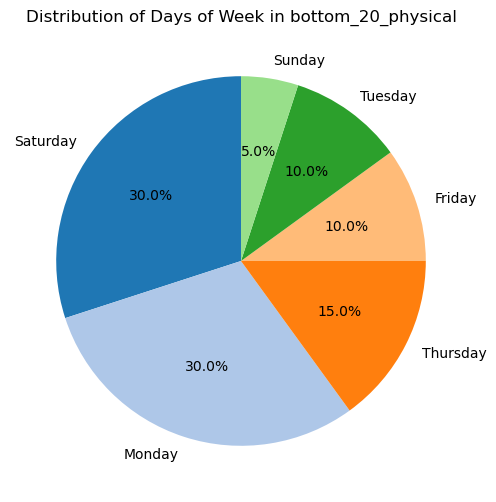

In [533]:
import matplotlib.pyplot as plt

# Count occurrences of each day
day_counts = bottom_20_physical['DayofWeek'].value_counts()

# Plot pie chart
plt.figure(figsize=(6,6))
plt.pie(day_counts, labels=day_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.tab20.colors)
plt.title("Distribution of Days of Week in bottom_20_physical")
plt.show()

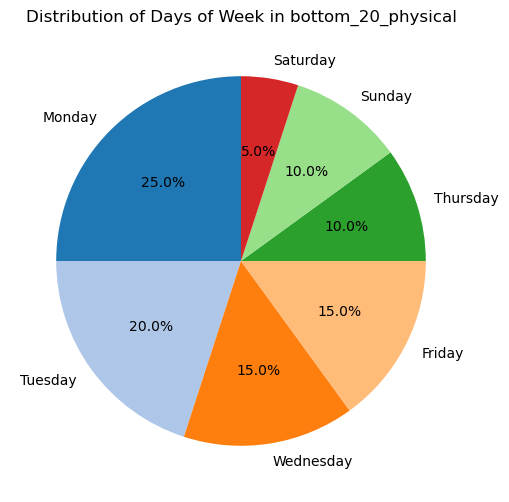

In [561]:
import matplotlib.pyplot as plt

# Count occurrences of each day
day_counts = bottom_20_mental['DayofWeek'].value_counts()

# Plot pie chart
plt.figure(figsize=(6,6))
plt.pie(day_counts, labels=day_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.tab20.colors)
plt.title("Distribution of Days of Week in bottom_20_physical")
plt.show()

## Creating a data frame that has calculated physical and mental scores for every date


In [534]:
full_score_df=pd.merge(
                    df_physical_scaled,
                    df_mental_scaled,
                    on='Date',
                    how='inner')

In [535]:
full_score_df.shape

(224, 58)

In [536]:
full_score_df['Physical_Rank']=full_score_df['Physical_Score'].rank(ascending=False, method='dense')
full_score_df['Mental_Rank']=full_score_df['Mental_Score'].rank(ascending=False, method='dense')

In [537]:
full_score_df.head()

,Date,Sleep_Ratio,HRV_avg,Fatigue_PM,Energy_AM,HR_min,Steps_x,Calories(kcal)_x,Clean_5min_x,Journal_x,...,Screen_Time_min_y,TimeAsleep_min_y,Awake(min)_y,REM(min)_y,Light_Sleep(min)_y,Deep_Sleep(min)_y,DayofWeek_y,Mental_Score,Physical_Rank,Mental_Rank
0,2025-05-08,84.00%,0.561644,0.75,0.75,0.84,10230.0,1335.0,NaN,NaN,...,NaN,370.0,25.0,90.0,195.0,85.0,Thursday,0.8375,23.0,5.0
1,2025-05-09,79.00%,0.465753,1.00,0.50,0.76,10849.0,1361.0,NaN,NaN,...,NaN,468.0,32.0,105.0,288.0,75.0,Friday,0.5000,50.0,28.0
2,2025-05-11,93.00%,0.301370,0.25,0.75,0.72,13805.0,1632.0,NaN,NaN,...,NaN,392.0,18.0,125.0,172.0,95.0,Sunday,0.5750,121.0,25.0
3,2025-05-11,93.00%,0.301370,0.25,0.75,0.72,13805.0,1632.0,NaN,NaN,...,NaN,392.0,18.0,125.0,172.0,95.0,Sunday,0.8750,121.0,3.0
4,2025-05-11,93.00%,0.301370,0.75,0.75,0.72,13805.0,1632.0,NaN,NaN,...,NaN,392.0,18.0,125.0,172.0,95.0,Sunday,0.5750,81.0,25.0


In [538]:
df_physical_scaled.shape

(161, 31)

In [539]:
full_score_df['Mental_Score'].nunique()


44

In [540]:
full_score_df['Physical_Score'].nunique()

144

In [541]:
full_score_df['Physical_Pct'] = full_score_df['Physical_Score'].rank(pct=True)
full_score_df['Mental_Pct'] = full_score_df['Mental_Score'].rank(pct=True)

## Investigating Correlation between how I feel physically and mentally

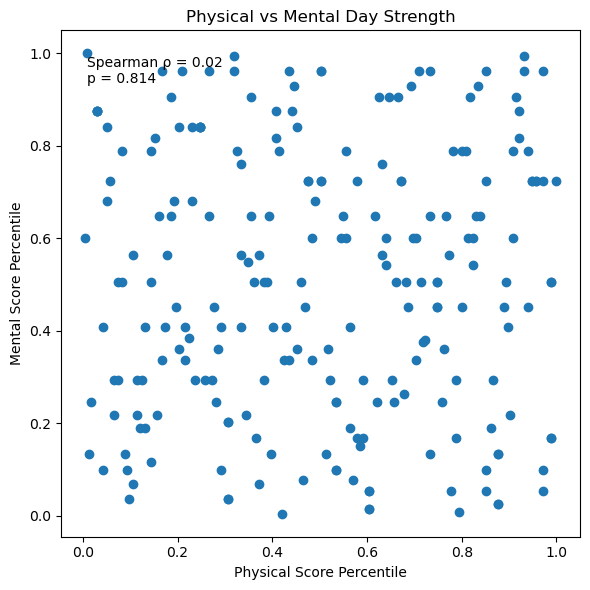

In [581]:
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

# Compute correlation
rho, pval = spearmanr(
    full_score_df['Physical_Pct'],
    full_score_df['Mental_Pct'],
    nan_policy='omit'
)

# Plot
plt.figure(figsize=(6, 6))
plt.scatter(
    full_score_df['Physical_Pct'],
    full_score_df['Mental_Pct']
)

plt.xlabel('Physical Score Percentile')
plt.ylabel('Mental Score Percentile')
plt.title('Physical vs Mental Day Strength')

# Annotate correlation
plt.text(
    0.05, 0.95,
    f"Spearman ρ = {rho:.2f}\np = {pval:.3f}",
    transform=plt.gca().transAxes,
    verticalalignment='top',
    fontsize=10
)

plt.tight_layout()
outfile=os.path.join(save_dir,"CorrPlot.png")
plt.savefig(outfile,dpi=300,bbox_inches='tight')
plt.show()

## Heatmaps to look for calender trends for how I am feeling physically and mentally 

In [543]:
#plotting over time
pm_form['Day']=pm_form['Date'].dt.day
pm_form['Month']=pm_form['Date'].dt.month
pm_form['MonthName']=pm_form['Date'].dt.month_name()

heatmap_data=pm_form.pivot_table(
    index='Month',
    columns='Day',
    values='Fatigue_PM'
)

heatmap_data=heatmap_data.sort_index()

In [544]:
#plotting over time
df_physical_scaled['Day']=df_physical_scaled['Date'].dt.day
df_physical_scaled['Month']=df_physical_scaled['Date'].dt.month
df_physical_scaled['MonthName']=df_physical_scaled['Date'].dt.month_name()

heatmap_data=df_physical_scaled.pivot_table(
    index='Month',
    columns='Day',
    values='Physical_Score'
)

heatmap_data=heatmap_data.sort_index()

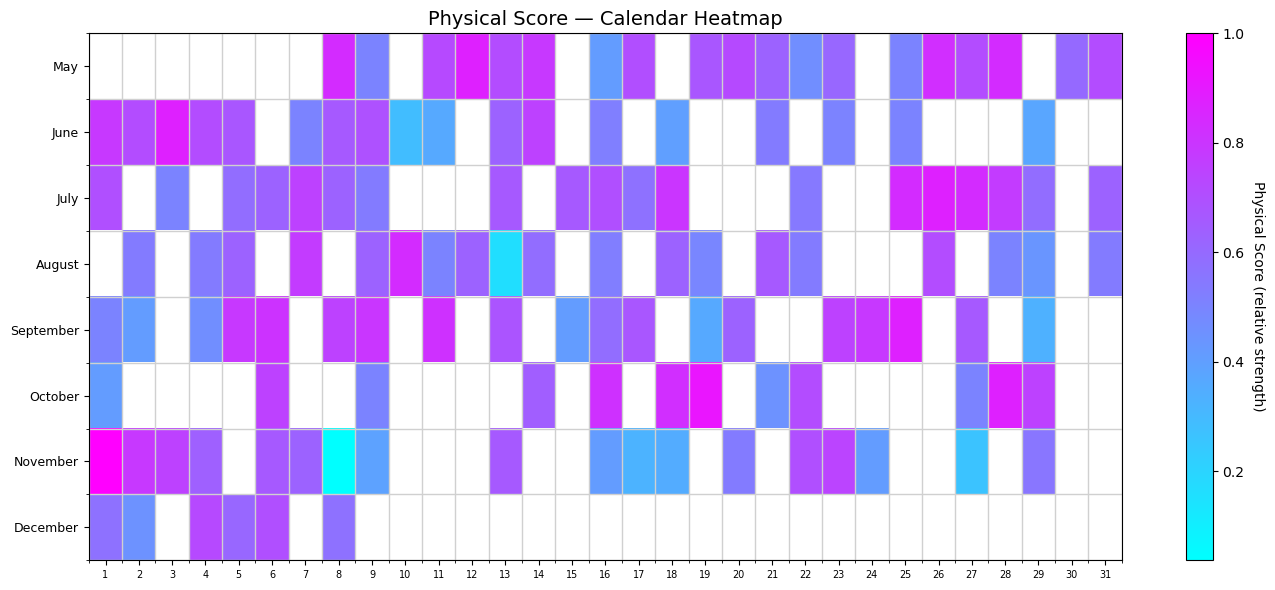

In [582]:
fig, ax = plt.subplots(figsize=(14, 6))

im = ax.imshow(
    heatmap_data.values,
    aspect='auto',
    cmap=plt.cm.cool,
    vmin=heatmap_data.min().min(),
    vmax=heatmap_data.max().max()
)

# Gridlines
ax.set_xticks(np.arange(-0.5, heatmap_data.shape[1], 1), minor=True)
ax.set_yticks(np.arange(-0.5, heatmap_data.shape[0], 1), minor=True)
ax.grid(which='minor', color='#d0d0d0', linewidth=1)

# X-axis: days
ax.set_xticks(np.arange(heatmap_data.shape[1]))
ax.set_xticklabels(heatmap_data.columns, fontsize=7)

# Y-axis: month names
month_labels = [
    pd.to_datetime(f"2025-{m}-01").strftime('%B')
    for m in heatmap_data.index
]
ax.set_yticks(np.arange(heatmap_data.shape[0]))
ax.set_yticklabels(month_labels, fontsize=9)

# Labels + colorbar
plt.title("Physical Score — Calendar Heatmap", fontsize=14)
cbar = plt.colorbar(im, ax=ax)
cbar.set_label("Physical Score (relative strength)", rotation=270, labelpad=15)

plt.tight_layout()
outfile=os.path.join(save_dir,"PhysicalHeatmap.png")
plt.savefig(outfile,dpi=300,bbox_inches='tight')
plt.show()

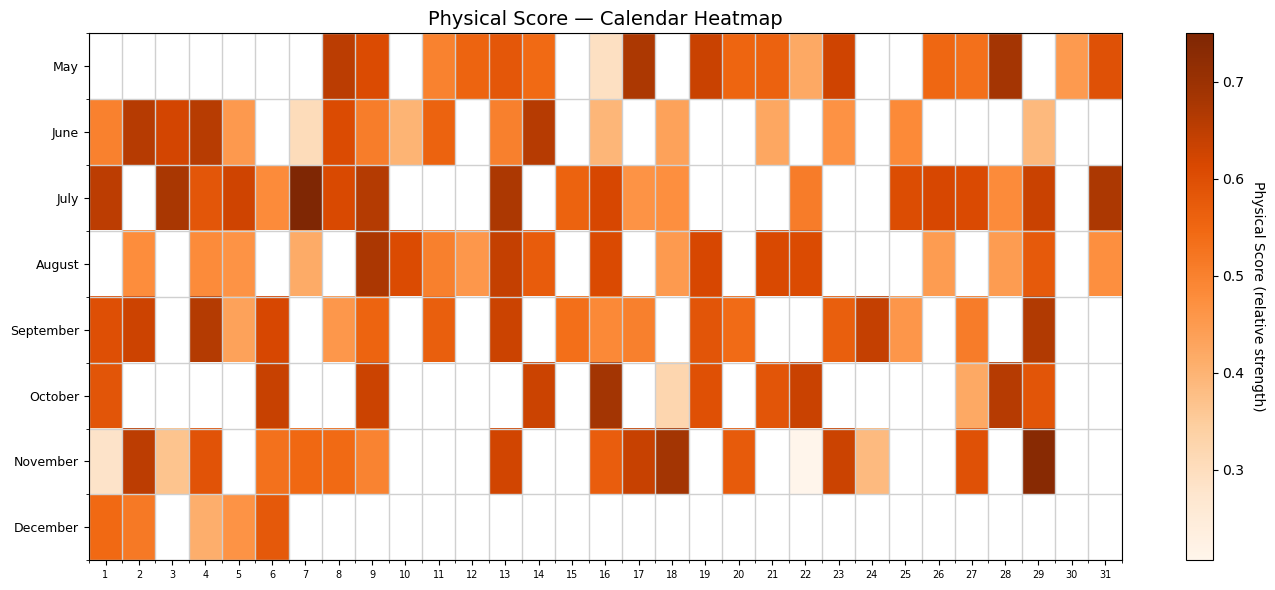

In [546]:
fig, ax = plt.subplots(figsize=(14, 6))

im = ax.imshow(
    heatmap_data.values,
    aspect='auto',
    cmap=plt.cm.Oranges,
    vmin=heatmap_data.min().min(),
    vmax=heatmap_data.max().max()
)

# Gridlines
ax.set_xticks(np.arange(-0.5, heatmap_data.shape[1], 1), minor=True)
ax.set_yticks(np.arange(-0.5, heatmap_data.shape[0], 1), minor=True)
ax.grid(which='minor', color='#d0d0d0', linewidth=1)

# X-axis: days
ax.set_xticks(np.arange(heatmap_data.shape[1]))
ax.set_xticklabels(heatmap_data.columns, fontsize=7)

# Y-axis: month names
month_labels = [
    pd.to_datetime(f"2025-{m}-01").strftime('%B')
    for m in heatmap_data.index
]
ax.set_yticks(np.arange(heatmap_data.shape[0]))
ax.set_yticklabels(month_labels, fontsize=9)

# Labels + colorbar
plt.title("Physical Score — Calendar Heatmap", fontsize=14)
cbar = plt.colorbar(im, ax=ax)
cbar.set_label("Physical Score (relative strength)", rotation=270, labelpad=15)

plt.tight_layout()
plt.show()

In [547]:
df_physical_scaled.shape

(161, 34)

In [548]:
# Make sure 'Date' is datetime
df_physical_scaled['Date'] = pd.to_datetime(df_physical_scaled['Date'])

# Filter by date range
start_date = '2025-05-08'
end_date = '2025-12-06'

filtered_df = df_physical_scaled[
    (df_physical_scaled['Date'] >= start_date) &
    (df_physical_scaled['Date'] <= end_date)
]

# Show shape
print(filtered_df.shape)

(161, 34)


In [549]:
# Drop missing dates first
am_dates = set(am_form['Date'].dropna())
pm_dates = set(pm_form['Date'].dropna())

# Find intersection
common_dates = am_dates & pm_dates

print(f"Number of dates in both AM and PM forms: {len(common_dates)}")

Number of dates in both AM and PM forms: 131


In [550]:
df_physical.head()

,Date,Sleep_Ratio,HRV_avg,Fatigue_PM,Energy_AM,HR_min,Steps,Calories(kcal),Clean_5min,Journal,...,PickUps,Message_notifications,Screen_Time_min,Wake_Up_Time,TimeAsleep_min,Awake(min),REM(min),Light_Sleep(min),Deep_Sleep(min),DayofWeek
0,2025-01-01,80.00%,51.0,NaN,NaN,51.0,3734.0,1316.0,NaN,NaN,...,NaN,NaN,NaN,2025-12-19 05:55:00,255.0,25.0,75.0,130.0,50.0,NaN
1,2025-01-02,93.00%,73.0,NaN,NaN,43.0,5414.0,1376.0,NaN,NaN,...,NaN,NaN,NaN,2025-12-19 08:01:00,648.0,12.0,118.0,402.0,128.0,NaN
2,2025-01-03,82.00%,77.0,NaN,NaN,45.0,8335.0,1510.0,NaN,NaN,...,NaN,NaN,NaN,2025-12-19 08:58:00,533.0,82.0,55.0,378.0,100.0,NaN
3,2025-01-04,NaN,58.0,NaN,NaN,55.0,5725.0,1313.0,NaN,NaN,...,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
4,2025-01-05,91.00%,56.0,NaN,NaN,52.0,3107.0,1297.0,NaN,NaN,...,NaN,NaN,NaN,2025-12-19 09:03:00,455.0,20.0,125.0,240.0,90.0,NaN


In [551]:
df_physical_scaled.head(50)

,Date,Sleep_Ratio,HRV_avg,Fatigue_PM,Energy_AM,HR_min,Steps,Calories(kcal),Clean_5min,Journal,...,Awake(min),REM(min),Light_Sleep(min),Deep_Sleep(min),DayofWeek,Fatgue_PM,Physical_Score,Day,Month,MonthName
131,2025-05-08,84.00%,0.561644,0.75,0.75,0.84,10230.0,1335.0,NaN,NaN,...,25.0,90.0,195.0,85.0,Thursday,1.0,0.653293,8,5,May
132,2025-05-09,79.00%,0.465753,1.00,0.50,0.76,10849.0,1361.0,NaN,NaN,...,32.0,105.0,288.0,75.0,Friday,0.0,0.606926,9,5,May
134,2025-05-11,93.00%,0.301370,0.25,0.75,0.72,13805.0,1632.0,NaN,NaN,...,18.0,125.0,172.0,95.0,Sunday,3.0,0.448811,11,5,May
135,2025-05-11,93.00%,0.301370,0.75,0.75,0.72,13805.0,1632.0,NaN,NaN,...,18.0,125.0,172.0,95.0,Sunday,1.0,0.548811,11,5,May
136,2025-05-12,96.00%,0.630137,0.25,0.75,0.76,10016.0,1308.0,NaN,NaN,...,10.0,105.0,260.0,105.0,Monday,3.0,0.556241,12,5,May
137,2025-05-13,90.00%,0.547945,0.50,0.75,0.76,13183.0,1369.0,NaN,NaN,...,20.0,75.0,240.0,70.0,Tuesday,2.0,0.581584,13,5,May
138,2025-05-14,90.00%,0.589041,0.25,0.75,0.76,6363.0,1318.0,NaN,NaN,...,13.0,55.0,374.0,95.0,Wednesday,3.0,0.543912,14,5,May
140,2025-05-16,88.00%,0.150685,0.25,0.50,0.44,13951.0,1400.0,NaN,NaN,...,18.0,90.0,282.0,75.0,Friday,3.0,0.292005,16,5,May
141,2025-05-17,92.00%,0.493151,1.00,1.00,0.68,17903.0,1614.0,NaN,NaN,...,11.0,110.0,314.0,95.0,Saturday,0.0,0.697545,17,5,May
142,2025-05-17,92.00%,0.493151,0.75,1.00,0.68,17903.0,1614.0,NaN,NaN,...,11.0,110.0,314.0,95.0,Saturday,1.0,0.647545,17,5,May


## Looking into behaviors on my best and worst days

In [552]:
curious_vars=['Steps',
       'Calories(kcal)', 'Clean_5min', 'Journal', 'workout',
       'consume_literature', 'Turkish', 'Creatine', 'Meditation',
        'Instagram', 'TikTok', 'Messages', 'PickUps',
       'Message_notifications', 'Screen_Time_min', 
       'TimeAsleep_min', 'Awake(min)', 'REM(min)', 'Light_Sleep(min)',
       'Deep_Sleep(min)']

In [573]:
# Compute group means
top_means = top_20_physical[curious_vars].mean()
bottom_means = bottom_20_physical[curious_vars].mean()

# Combine into one table
comparison_df = pd.DataFrame({
    'Top_20_Mean': top_means,
    'Bottom_20_Mean': bottom_means
})

# Add difference
comparison_df['Difference (Top - Bottom)'] = (
(comparison_df['Top_20_Mean'] - comparison_df['Bottom_20_Mean'])/(comparison_df['Top_20_Mean'])*100
)

# Sort by absolute difference
comparison_df = comparison_df.sort_values(
    'Difference (Top - Bottom)',
    key=lambda x: x.abs(),
    ascending=False
)

comparison_df



,Top_20_Mean,Bottom_20_Mean,Difference (Top - Bottom)
Message_notifications,67.200000,168.166667,-150.248016
Clean_5min,0.416667,0.214286,48.571429
Awake(min),43.100000,24.105263,44.071315
TikTok,28.600000,20.166667,29.487179
Light_Sleep(min),300.050000,236.894737,21.048246
Meditation,0.550000,0.650000,-18.181818
Instagram,66.200000,76.833333,-16.062437
TimeAsleep_min,469.800000,399.000000,15.070243
Journal,0.583333,0.500000,14.285714
Turkish,0.250000,0.285714,-14.285714


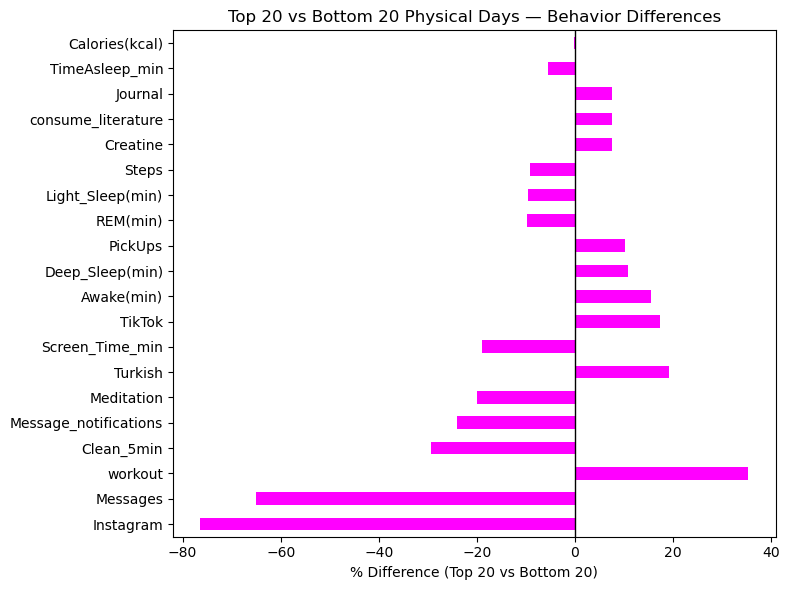

In [579]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
comparison_df['Difference (Top - Bottom)'].plot(kind='barh', color='magenta')
plt.axvline(0, color='black', linewidth=1)

plt.title('Top 20 vs Bottom 20 Physical Days — Behavior Differences')
plt.xlabel('% Difference (Top 20 vs Bottom 20)')
plt.tight_layout()
outfile=os.path.join(save_dir,"PhysicalBehavior.png")
plt.savefig(outfile,dpi=300,bbox_inches='tight')
plt.show()

In [554]:
print(top_20_physical[curious_vars].dtypes)

Steps                    float64
Calories(kcal)           float64
Clean_5min               float64
Journal                  float64
workout                  float64
consume_literature       float64
Turkish                  float64
Creatine                 float64
Meditation                 int64
Instagram                float64
TikTok                   float64
Messages                 float64
PickUps                  float64
Message_notifications    float64
Screen_Time_min          float64
TimeAsleep_min           float64
Awake(min)               float64
REM(min)                 float64
Light_Sleep(min)         float64
Deep_Sleep(min)          float64
dtype: object


In [577]:
# Compute group means
top_means = top_20_mental[curious_vars].mean()
bottom_means = bottom_20_mental[curious_vars].mean()

# Combine into one table
comparison_df = pd.DataFrame({
    'Top_20_Mean': top_means,
    'Bottom_20_Mean': bottom_means
})

# Add difference
comparison_df['Difference (Top - Bottom)'] = (
(comparison_df['Top_20_Mean'] - comparison_df['Bottom_20_Mean'])/(comparison_df['Top_20_Mean'])*100
)

# Sort by absolute difference
comparison_df = comparison_df.sort_values(
    'Difference (Top - Bottom)',
    key=lambda x: x.abs(),
    ascending=False
)

comparison_df

,Top_20_Mean,Bottom_20_Mean,Difference (Top - Bottom)
Instagram,48.000000,84.666667,-76.388889
Messages,28.000000,46.222222,-65.079365
workout,0.818182,0.529412,35.294118
Clean_5min,0.363636,0.470588,-29.411765
Message_notifications,109.250000,135.444444,-23.976608
Meditation,0.500000,0.600000,-20.000000
Turkish,0.363636,0.294118,19.117647
Screen_Time_min,267.250000,317.888889,-18.948134
TikTok,23.500000,19.444444,17.257683
Awake(min),28.894737,24.444444,15.401741


In [558]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Ensure Date is datetime
df_mental_scaled['Date'] = pd.to_datetime(df_mental_scaled['Date'])

# Extract calendar components
df_mental_scaled['Day'] = df_mental_scaled['Date'].dt.day
df_mental_scaled['Month'] = df_mental_scaled['Date'].dt.month
df_mental_scaled['MonthName'] = df_mental_scaled['Date'].dt.month_name()

# Pivot: rows = month, columns = day, values = Mental_Score
heatmap_data = df_mental_scaled.pivot_table(
    index='Month',
    columns='Day',
    values='Mental_Score'
)

# Sort months
heatmap_data = heatmap_data.sort_index()

In [560]:
df_mental_scaled.tail(80)

,Date,Mind_AM,Mental_PM,Satisfied_PM,Optimism_AM,Steps,Calories(kcal),Clean_5min,Journal,workout,...,TimeAsleep_min,Awake(min),REM(min),Light_Sleep(min),Deep_Sleep(min),DayofWeek,Mental_Score,Day,Month,MonthName
252,2025-08-21,0.50,0.75,1.00,0.50,9256.0,1292.0,0.0,0.0,1.0,...,255.0,5.0,95.0,115.0,45.0,Thursday,0.6625,21,8,August
253,2025-08-22,0.50,0.50,0.75,0.50,6068.0,1247.0,0.0,0.0,0.0,...,559.0,27.0,130.0,359.0,70.0,Friday,0.5375,22,8,August
258,2025-08-26,0.75,0.75,0.75,0.50,8925.0,1296.0,0.0,0.0,0.0,...,380.0,6.0,105.0,203.0,72.0,Tuesday,0.7125,26,8,August
260,2025-08-28,0.50,0.50,0.75,0.25,8931.0,1371.0,0.0,0.0,0.0,...,398.0,32.0,70.0,278.0,50.0,Thursday,0.5000,28,8,August
261,2025-08-29,0.50,0.25,0.25,0.50,12175.0,1312.0,0.0,0.0,0.0,...,398.0,26.0,55.0,273.0,70.0,Friday,0.3750,29,8,August
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,2025-12-04,0.75,0.75,1.00,0.75,9137.0,1370.0,1.0,1.0,0.0,...,525.0,10.0,155.0,300.0,70.0,Thursday,0.7875,4,12,December
377,2025-12-04,0.75,0.50,0.75,0.75,9137.0,1370.0,1.0,1.0,0.0,...,525.0,10.0,155.0,300.0,70.0,Thursday,0.6625,4,12,December
378,2025-12-05,0.50,0.50,1.00,0.75,4834.0,1238.0,0.0,1.0,0.0,...,408.0,8.0,75.0,248.0,85.0,Friday,0.6125,5,12,December
379,2025-12-06,0.75,0.50,1.00,0.75,8270.0,1336.0,1.0,0.0,1.0,...,430.0,15.0,60.0,278.0,92.0,Saturday,0.7000,6,12,December


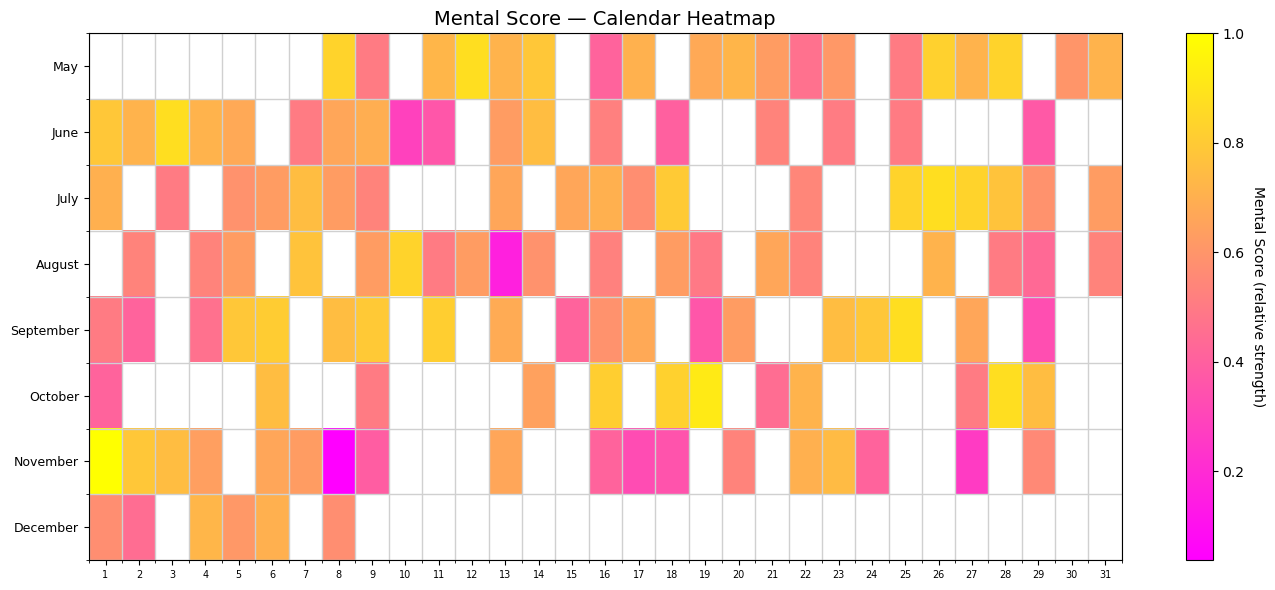

In [583]:
fig, ax = plt.subplots(figsize=(14, 6))

im = ax.imshow(
    heatmap_data.values,
    aspect='auto',
    cmap=plt.cm.spring,  # different color map for mental
    vmin=heatmap_data.min().min(),
    vmax=heatmap_data.max().max()
)

# Gridlines
ax.set_xticks(np.arange(-0.5, heatmap_data.shape[1], 1), minor=True)
ax.set_yticks(np.arange(-0.5, heatmap_data.shape[0], 1), minor=True)
ax.grid(which='minor', color='#d0d0d0', linewidth=1)

# X-axis: days
ax.set_xticks(np.arange(heatmap_data.shape[1]))
ax.set_xticklabels(heatmap_data.columns, fontsize=7)

# Y-axis: month names
month_labels = [
    pd.to_datetime(f"2025-{m}-01").strftime('%B')
    for m in heatmap_data.index
]
ax.set_yticks(np.arange(heatmap_data.shape[0]))
ax.set_yticklabels(month_labels, fontsize=9)

# Labels + colorbar
plt.title("Mental Score — Calendar Heatmap", fontsize=14)
cbar = plt.colorbar(im, ax=ax)
cbar.set_label("Mental Score (relative strength)", rotation=270, labelpad=15)

plt.tight_layout()
outfile=os.path.join(save_dir,"MentalHeatmap.png")
plt.savefig(outfile,dpi=300,bbox_inches='tight')
plt.show()

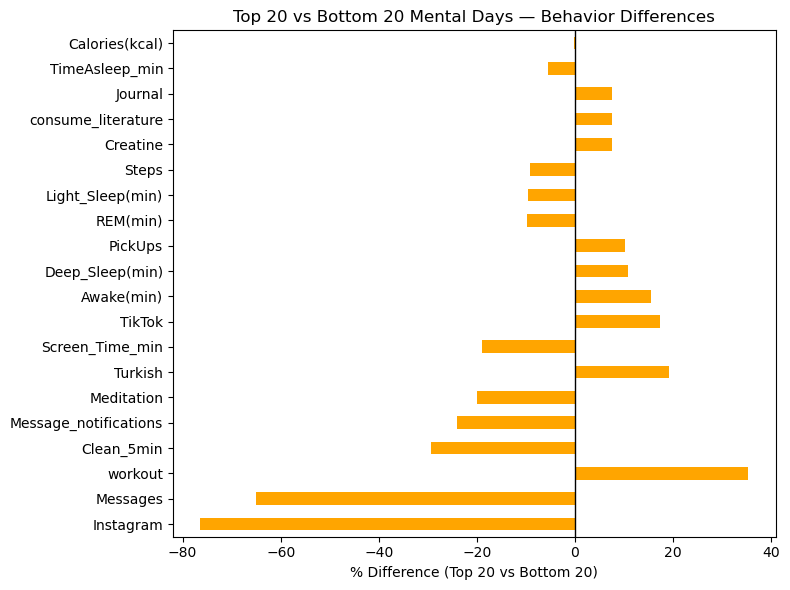

In [580]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
comparison_df['Difference (Top - Bottom)'].plot(kind='barh', color='orange')
plt.axvline(0, color='black', linewidth=1)

plt.title('Top 20 vs Bottom 20 Mental Days — Behavior Differences')
plt.xlabel('% Difference (Top 20 vs Bottom 20)')
plt.tight_layout()
outfile=os.path.join(save_dir,"Mental_Behaviors.png")
plt.savefig(outfile,dpi=300,bbox_inches='tight')
plt.show()